In [ ]:
!pip -q install diffusers transformers accelerate sentence-transformers faiss-cpu gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
!pip -q install langchain sentence-transformers openai tiktoken


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.4 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import gradio as gr
import json
import os

In [ ]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains import LLMChain
from langchain.llms import HuggingFaceHub
from langchain.prompts import PromptTemplate
from langchain.docstore.document import Document



In [ ]:
from google.colab import userdata
huggu=userdata.get('HUGGING_FACE_API')

In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "SG161222/Realistic_Vision_V4.0",
    torch_dtype=torch.float16
).to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Base texts for retrieval (can be extended)
texts = [
    "A futuristic cityscape at night.",
    "A peaceful village in the mountains.",
    "An astronaut walking on Mars.",
    "A dragon flying over a castle.",
    "A serene beach at sunset.",
    "A bustling urban street in Tokyo.",
    "A dense jungle full of exotic wildlife.",
    "An underwater coral reef with colorful fishes.",
    "A snowy mountain peak during sunrise.",
    "A medieval battlefield with knights in armor.",
    "A deep space nebula with vibrant colors.",
    "A futuristic robot exploring an alien planet.",
    "An enchanted forest with glowing trees.",
    "A pirate ship sailing during a storm.",
    "A cowboy riding through the desert.",
    "A giant mecha robot in an abandoned city.",
    "A magical wizard casting spells in a dungeon.",
    "A racing car speeding on a neon-lit highway.",
    "A breathtaking canyon with a river flowing.",
    "A massive waterfall in the heart of a rainforest."
]

documents = [Document(page_content=t) for t in texts]
db = FAISS.from_documents(documents, embedding_model)

# -----------------------------
# LangChain Prompt Enhancer Chain
# -----------------------------
# Optional: You can use HuggingFaceHub with a free token or local model
# llm = HuggingFaceHub(repo_id="google/flan-t5-base", model_kwargs={"temperature": 0.5, "max_length": 64})

# If no API key, you can skip LLMChain for now and use retrieval only
prompt_template = PromptTemplate(
    input_variables=["original", "contexts"],
    template="Enhance this prompt: '{original}' using the following related ideas: {contexts}. Respond with a creative version of the prompt."
)

def enhance_prompt(user_prompt):
    # Retrieve top-3 similar texts
    docs = db.similarity_search(user_prompt, k=3)
    contexts = ", ".join([doc.page_content for doc in docs])

    # Simple enhancement
    enhanced = f"{user_prompt}, {contexts}"

    # Optionally: Run through LLM for rewording (commented out if no key)
    # chain = LLMChain(llm=llm, prompt=prompt_template)
    # result = chain.run({"original": user_prompt, "contexts": contexts})
    # return result.strip()

    return enhanced


<ipython-input-18-2117c2f408f8>:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [ ]:
FEEDBACK_FILE = "feedback_data.json"

# Initialize feedback file
if not os.path.exists(FEEDBACK_FILE):
    with open(FEEDBACK_FILE, "w") as f:
        json.dump([], f)

In [ ]:
def save_feedback(prompt, enhanced_prompt, feedback):
    data_entry = {
        "prompt": prompt,
        "enhanced_prompt": enhanced_prompt,
        "feedback": feedback
    }
    with open(FEEDBACK_FILE, "r+") as f:
        data = json.load(f)
        data.append(data_entry)
        f.seek(0)
        json.dump(data, f, indent=2)


In [ ]:
def generate_image_with_rag(user_prompt, feedback="No Feedback"):
    # Step 1: Enhance prompt via RAG
    enhanced_prompt = retrieve_enhanced_prompt(user_prompt, top_k=1)[0]

    # Step 2: Generate image
    result = pipe(enhanced_prompt, num_inference_steps=50).images[0]


    # Step 3: Save feedback (RL loop)
    save_feedback(user_prompt, enhanced_prompt, feedback)

    return result, enhanced_prompt


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Create a blank image (1280x720 resolution)
width, height = 1280, 720
image = Image.new('RGB', (width, height), color='black')

# Initialize drawing context
draw = ImageDraw.Draw(image)

# Add text to image
text = "Your YouTube Title"
font = ImageFont.load_default()  # Use a default font available in Colab

# Calculate text size using textbbox (bounding box)
bbox = draw.textbbox((0, 0), text, font)
text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]  # Get width and height from bounding box
text_position = ((width - text_width) // 2, (height - text_height) // 3)  # Centered text

draw.text(text_position, text, font=font, fill="white")  # Customize text color

# Show the image
image.show()

# Save the image as a PNG file
image.save('/content/thumbnail.png')

# Optionally, you can enable a download link for Colab users
from google.colab import files
files.download('/content/thumbnail.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/50 [00:00<?, ?it/s]

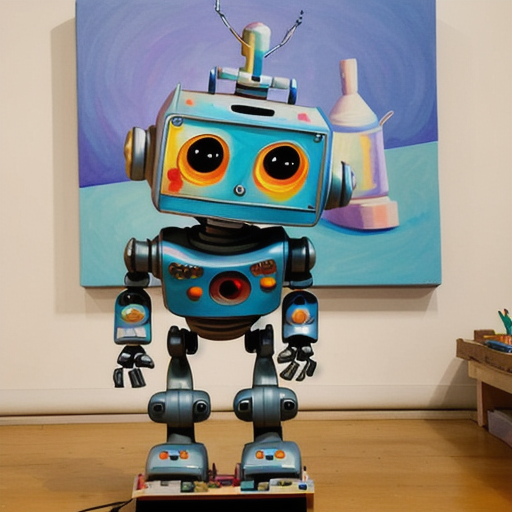

Enhanced Prompt Used: A cute robot painting in an art studio, Pixar style


In [ ]:
from IPython.display import display

# Generate the image
user_prompt = "A cute robot painting in an art studio, Pixar style"


feedback = "Good"
generated_image, enhanced_prompt = generate_image_with_rag(user_prompt, feedback)

# Display the generated image (Colab-safe way)
display(generated_image)

# Print the enhanced prompt
print(f"Enhanced Prompt Used: {enhanced_prompt}")


In [ ]:

def inference(user_prompt, feedback):
    image, enhanced = generate_image_with_rag(user_prompt, feedback)
    return image, f"Enhanced Prompt Used: {enhanced}"

with gr.Blocks() as demo:
    gr.Markdown("# 🎨 Text-to-Image Creator with RAG + RL Feedback")
    with gr.Row():
        with gr.Column():
            user_prompt = gr.Textbox(label="Enter your prompt")
            feedback = gr.Dropdown(["Good", "Bad", "No Feedback"], value="No Feedback", label="Feedback (after generation)")
            generate_btn = gr.Button("Generate Image")
        with gr.Column():
            output_image = gr.Image(label="Generated Image")
            enhanced_prompt_display = gr.Label(label="Enhanced Prompt")

    generate_btn.click(inference, inputs=[user_prompt, feedback], outputs=[output_image, enhanced_prompt_display])

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4705f69ec9be0cad38.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

def generate_thumbnail(text):
    # Same image generation code as above
    image = Image.new('RGB', (1280, 720), color='black')
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 100)
    text_width, text_height = draw.textsize(text, font)
    text_position = ((1280 - text_width) // 2, (720 - text_height) // 3)
    draw.text(text_position, text, font=font, fill="white")
    return image

gr.Interface(fn=generate_thumbnail, inputs="text", outputs="image").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e4ec2f0b4456bc773a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
